# Solution for Homework 9

Run the code given below to create 500 simulated 2-dimensional observations ```X``` and corresponding true labels ```y_true```. True labels range from 0 to 3. We're using 60\% of these data as our training data to fit the model and will reserve the remaining 200 points (40\% of 500) as our validation data. 

Also, we're creating a scatterplot of the data and indicating group membership by use of the four colors magenta (group 0), green (group 1), yellow (group 2), blue (group 3), respectively. The training data are shown as round circles, whereas the validation data are shown as stars. 

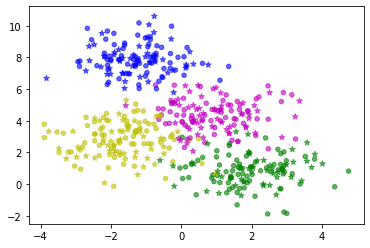

In [1]:
from sklearn.datasets import make_blobs 
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=500, centers=4,
                                  cluster_std=1, center_box=(-10.0, 10.0), random_state=0) 


np.random.seed(11)
train_X, val_X, train_y, val_y = train_test_split(X, y_true, test_size=0.4)

fig, ax = plt.subplots()
colors = ('m', 'g', 'y', 'b')
ax.scatter(train_X[:, 0], train_X[:, 1], c = [colors[train_y[i]] for i in range(len(train_y))], s=20, alpha = 0.6)
ax.scatter(val_X[:, 0], val_X[:, 1], marker = "*", c = [colors[val_y[i]] for i in range(len(val_y))], alpha = 0.6); 

## Problem 1

(a) Consider the data train_X, train_y) that were simulated above to be your training data. Use the Gaussian Naive Bayes algorithm to predict the label color of the point x with coordinates (0,2) "by-hand" (that is, without using any SciKitLearn methods). Show your work. It's ok to use Numpy. You can compute multivariate normal densities using the ```scipy.stats``` module or by using your calculator. Please state which method you used in your answer.  

Optional code box:

In [2]:
# first, find sample mean vectors and sample covariance matrices of the four separate groups

import numpy as np
from scipy.stats import multivariate_normal

means = []
cov = []

for i in range(4):
    idx = (train_y==i)
    means.append(np.mean(train_X[idx,:],axis = 0))
    cov.append(np.cov(train_X[idx,:].T))
    
# Then compute the multivariate Normal density at the given point x=(0,2) for each of the four distributions

densities = []

for i in range(4):
    rv = multivariate_normal(means[i], cov[i])
    densities.append(rv.pdf((0,2)))
    
colors[np.array(densities).argmax()] # assign color label for the group that produces the highest density value

'y'

Explain your code or show your work and state your answer here. If you are not using Python, but some other approach, make sure you explain how you come up with your answer. 

We first need to estimate the mean vector and covariance matrix of each of the four groups of points from the data. Then, we use those estimates to compute the values of the four multivariate Normal densities at the given point (0,2). The estimates $P(L_i)$ are all the same (equal to 0.25) since we have equally many points in the four groups. 
Hence, the most likely group is the one where the density is the highest. In this case that is the case for group with index 2 (and color 'yellow'). 

(b) Use SciKit-Learn to fit the Gaussian Naive Bayes classification algorithm to all points in the training data and use it to predict a label for each point in the validation (or testing) data. Produce a scatterplot of the points in the validation data set, colored by the predicted group labels. 

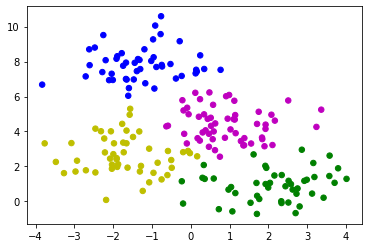

In [3]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(train_X, train_y)

y_predict = model.predict(val_X)

fig, ax = plt.subplots()
ax.scatter(val_X[:, 0], val_X[:, 1], c = [colors[y_predict[i]] for i in range(len(y_predict))], s=30); 

(c) Use SciKit-Learn to create a confusion matrix that compares your predicted labels (from (b)) to the true labels. Display your confusion matrix as a heat map like we did in class. Which percentage of points are predicted correctly by the Gaussian Naive Bayes algorithm?

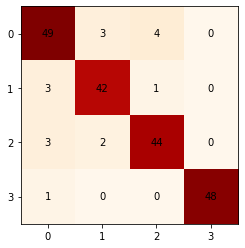

In [4]:
from sklearn.metrics import confusion_matrix
import numpy as np

mat = confusion_matrix(val_y, y_predict, labels=[0,1,2,3])

mat

fig, ax = plt.subplots()
ax.imshow(mat, cmap='OrRd') # making the heat-map image 
ax.set_xticks(np.arange(4)) # define tick-mark positions
ax.set_yticks(np.arange(4))
ax.set_xticklabels([0,1,2,3]) # label ticks 
ax.set_yticklabels([0,1,2,3]) 
for i in range(4): # Loop over data dimensions and create text annotations:
    for j in range(4):
        text = ax.text(j, i, mat[i, j], ha="center", va="center", color="k");

(42+52+43+52)/200 = 94.5\% of points are classified correctly by the Gaussian Naive Bayes method. 

## Problem 2

(a) Using the same training data simulated above (```train_X```) fit the k-means clustering algorithm (with k=4). Use the fitted model to cluster the validation data into k=4 clusters. For the resulting four clusters, use a majority vote over the true ```val_y``` labels to assign each cluster a label. 

**Hint:** we did something extremely similar in the clustering/classification of handwritten digits example we did in class. 

In [5]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=4) 
kmeans.fit(train_X)
y_kmeans = kmeans.predict(val_X)

from scipy.stats import mode

labels_kmeans = np.zeros_like(y_kmeans) # make empty NP array of clusters

for i in range(4):
    mask = (y_kmeans == i)       # pick out data one cluster at a time
    labels_kmeans[mask] = mode(val_y[mask])[0] 
        # take the most common true label in each group as the label

(b) Produce another scatterplot showing the 200 points in ```val_X``` and use the labels produced in Problem 2 (a) to color the points. 

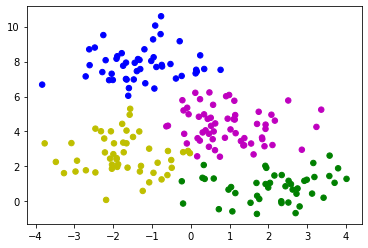

In [6]:
###BEGIN SOLUTION

fig, ax = plt.subplots()
ax.scatter(val_X[:, 0], val_X[:, 1], c = [colors[labels_kmeans[i]] for i in range(len(labels_kmeans))], s=30); 

###END SOLUTION

(c) Use SciKit-Learn to create a confusion matrix that compares your predicted labels (from 2 (b)) to the true labels ```val_y```.  Display your confusion matrix as a heat map like we did in class. Which percentage of points are predicted correctly by the k-means algorithm (with following majority vote over true labels)?

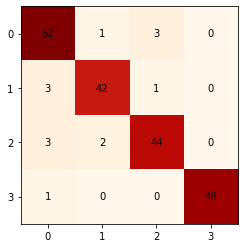

In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np

mat = confusion_matrix(val_y, labels_kmeans, labels=[0,1,2,3])

mat

fig, ax = plt.subplots()
ax.imshow(mat, cmap='OrRd') # making the heat-map image 
ax.set_xticks(np.arange(4)) # define tick-mark positions
ax.set_yticks(np.arange(4))
ax.set_xticklabels([0,1,2,3]) # label ticks with newsgroups
ax.set_yticklabels([0,1,2,3]) 
ax.set_ylim(len(mat)-0.5, -0.5) # there is a bug in matplotlib that offsets y-limits in heatmaps

for i in range(4): # Loop over data dimensions and create text annotations:
    for j in range(4):
        text = ax.text(j, i, mat[i, j], ha="center", va="center", color="k");


(43+51+42+52)/200 = 94.0\% of the points are classified correctly the by k-means algorithm. 

## Problem 3

(a) Use SciKit-Learn to fit a decision tree to the simulated training data ```(train_X, train_y)```. Set the ```max_depth``` of the tree to 3 (to make three nodes in your tree and end up with four different "leaves" on your tree). Use your fitted tree to predict the labels for the observations in the validation data. 

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

np.random.seed(10)
tree = DecisionTreeClassifier(max_depth=3) #
fitted = tree.fit(train_X, train_y)

y_tree = tree.predict(val_X)

(b) Produce another scatterplot showing the 200 points in ```val_X``` and use the labels produced by the Decision Tree procedure in Problem 4 (a) to color the points. 

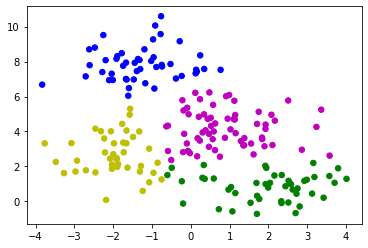

In [9]:
fig, axe = plt.subplots()
axe.scatter(val_X[:, 0], val_X[:, 1], c = [colors[y_tree[i]] for i in range(len(y_tree))], s=30); 

(c) Use SciKit-Learn to create a confusion matrix that compares your predicted labels (from 4 (a)) to the true labels ```val_y``` from our simulation. Which percentage of points are predicted correctly by the decision tree? Display your confusion matrix as a heat map like we did in class. 

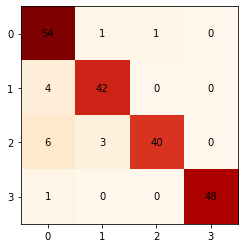

In [10]:
from sklearn.metrics import confusion_matrix
import numpy as np

mat = confusion_matrix(val_y, y_tree, labels=[0,1,2,3])

mat

fig, ax = plt.subplots()
ax.imshow(mat, cmap='OrRd') # making the heat-map image 
ax.set_xticks(np.arange(4)) # define tick-mark positions
ax.set_yticks(np.arange(4))
ax.set_xticklabels([0,1,2,3]) # label ticks with newsgroups
ax.set_yticklabels([0,1,2,3]) 
ax.set_ylim(len(mat)-0.5, -0.5) # there is a bug in matplotlib that offsets y-limits in heatmaps

for i in range(4): # Loop over data dimensions and create text annotations:
    for j in range(4):
        text = ax.text(j, i, mat[i, j], ha="center", va="center", color="k");

(40+51+42+49)/200= 91\% of the data are classified correctly through the decition tree algorithm. 

## Problem 4

Describe what differences you observe between the three different methods you applied. What differences can you see in the three scatter plots in terms of shapes of predicted point clouds? Based on how the three different classification methods work, which one is expected to do best on differentiating between our simulated "blobs"? Which method works best on the simulated data? How can you tell how well the methods work? 

The shape of our elliptical "blobs" is perhaps best represented by the results of the Naive Bayes algorithm. The k-means algorithm ignores the fact that our data has different variance in the two coordinates of X. The blobs derived from the decision tree become more rectangular due to the perpendicular decision boundaries used by this method. 

In terms of percentage of simulated observations correctly classified, the naive Bayes algorithm does better than the other two, with 94.5\% of observations correctly classified (compared to 94\% and 91\% achieved by the other two methods). With the k-means algorithm being a close second. 